In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt


def process_annotations(file_path, sheet_name, threshold):
    """
    Process the annotation data based on a given dissimilarity score threshold.

    Parameters:
    file_path (str): Path to the Excel file.
    sheet_name (str): Name of the sheet in the Excel file.
    threshold (float): Threshold for the dissimilarity score.

    Returns:
    pd.DataFrame: Updated DataFrame with carried forward annotations.
    float: Accuracy of the annotations.
    """

    # Load the data from the specified sheet
    data = pd.read_excel(file_path, sheet_name=sheet_name)

    # Copy the original annotations
    original_annotations = data.iloc[:, 1:-2].copy()  # Excluding frame number and Optical Flow Score

    # Initialize the 'annotation needed' column with 0s
    data['annotation needed'] = 0

    # Classify frames based on the threshold
    data.loc[data['Optical Flow Score'] > threshold, 'annotation needed'] = 1

    # Carry backwards annotations for frames where no new annotation is needed
    for col in original_annotations.columns:
        for i in range(len(data) - 2, -1, -1):
            if data.loc[i, 'annotation needed'] == 0:
                data.loc[i, col] = data.loc[i + 1, col]

    # Ensure columns match for comparison
    updated_annotations = data.iloc[:, 1:-2]  # Updated annotations, excluding frame number and last two columns
    matching_columns = updated_annotations.columns.intersection(original_annotations.columns)
    updated_annotations = updated_annotations[matching_columns]
    original_annotations = original_annotations[matching_columns]

    # Calculate accuracy
    correct_annotations = (original_annotations == updated_annotations).all(axis=1).sum()
    total_annotations = len(data)
    accuracy = correct_annotations / total_annotations

    return data, accuracy

###############################

def analyze_thresholds(file_path, sheet_name, threshold_range):
    accuracies = []
    for threshold in threshold_range:
        _, accuracy = process_annotations(file_path, sheet_name, threshold)
        accuracies.append(accuracy)

    return accuracies

def analyze_thresholds(file_path, threshold_range):
    # Print the video file path at the beginning
    print(f"Video File: {file_path}")

    # Open the Excel file and get all sheet names
    xls = pd.ExcelFile(file_path)
    sheet_names = xls.sheet_names

    # Iterate over each sheet
    for sheet_name in sheet_names:
        accuracies = []
        for threshold in threshold_range:
            _, accuracy = process_annotations(file_path, sheet_name, threshold)
            accuracies.append(accuracy)

        # Plotting the results for the current sheet
        plt.plot(threshold_range, accuracies, marker='o')
        plt.xlabel('Threshold')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy vs. Threshold for Sheet: {sheet_name}')
        plt.grid(True)
        plt.show()

Video File: C://Users//dulce//OneDrive//Documentos//Tese mestrado//Excel//VID75_optical_flow_scores.xlsx


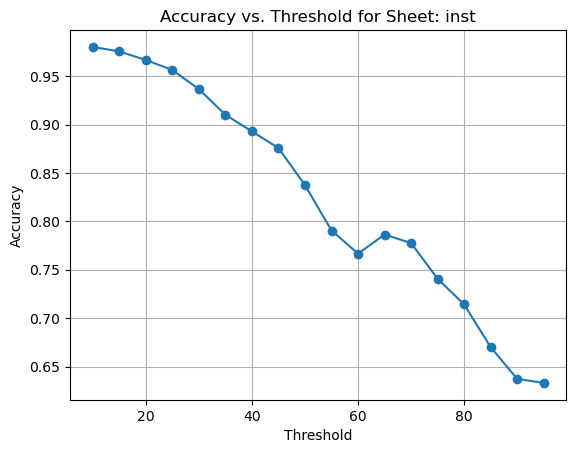

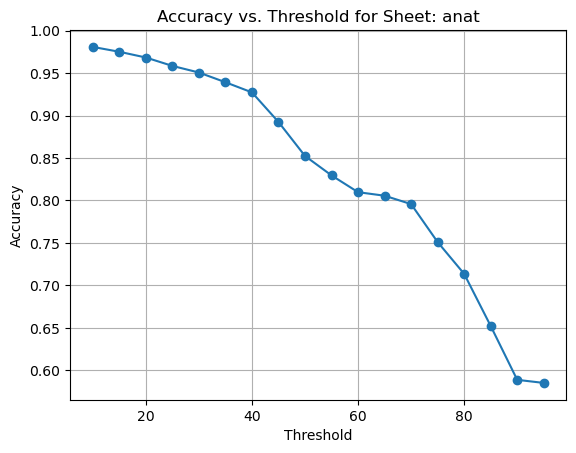

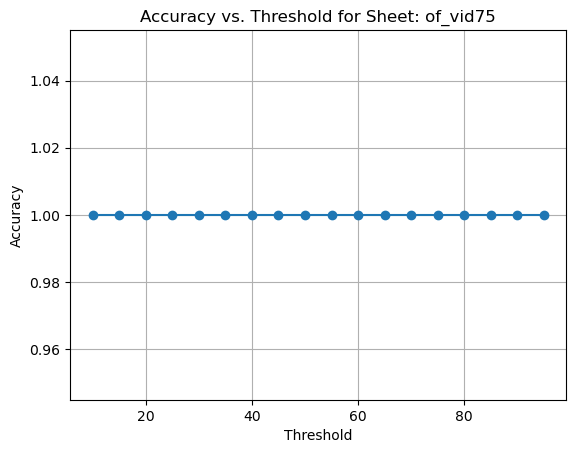

In [46]:
file_path = 'C://Users//dulce//OneDrive//Documentos//Tese mestrado//Excel//VID75_optical_flow_scores.xlsx'  # Replace with your file path
threshold_range = range(10, 100, 5)  # Example range of thresholds

analyze_thresholds(file_path, threshold_range)